In [4]:
import re
from collections import Counter 
import itertools 
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd

import matplotlib.pyplot as plt

In [7]:
items = pd.read_csv('item_to_id.csv',index_col = 'Item_id')
items.sort_index(inplace = True)
items.head(5)

,Item_name
Item_id,
1,sugar
2,lettuce
3,pet items
4,baby items
5,waffles


In [9]:
purchase_history = pd.read_csv('purchase_history.csv')
purchase_history.head(5)

,user_id,id
0,222087,"27,26"
1,1343649,"6,47,17"
2,404134,"18,12,23,22,27,43,38,20,35,1"
3,1110200,"9,23,2,20,26,47,37"
4,224107,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4..."


In [10]:
def count_item(df):
    all_item_ids = df['id'].str.split(',')
    counter = Counter(int(id) for id in all_item_ids)
    return pd.Series(counter)

user_item_count = purchase_history.groupby('user_id').apply(count_item).unstack(fill_value = 0)

In [11]:
user_item_count.head(5)

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
user_id,,,,,,,,,,,,,,,,,,,,,
47,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
68,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
113,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
123,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
223,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [15]:
user_item_totals = user_item_count.sum(axis = 1) # caculate the total items bought by each customer, axis = 1 means get the sum of a row
user_item_totals.head(5)

user_id
47     13
68      8
113    11
123     4
223    11
dtype: int64

In [18]:
print ('The customer who bought most items is:{}, and he/she bought {} items'.format(user_item_totals.argmax(),user_item_totals.max()))


The customer who bought most items is:269335, and he/she bought 72 items


/Users/xiaoyisun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


In [38]:
max_item_users = user_item_count.apply(lambda x : pd.Series([x.argmax(),x.max()],index = ['customer_id','item_count']))
max_item_users 

/Users/xiaoyisun/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
customer_id,31625,31625,154960,5289,217277,334664,175865,151926,269335,618914,...,599172,38872,133355,80215,996380,31625,1198106,1218645,384935,335841
item_count,4,5,4,3,3,4,3,3,4,4,...,5,4,4,4,4,4,5,4,4,3


In [39]:
max_item_users = max_item_users.transpose()
max_item_users.index.name = 'Item_id'

In [40]:
max_item_users = max_item_users.join(items).loc[:,['Item_name','customer_id','item_count']]
max_item_users.head(5)

,Item_name,customer_id,item_count
Item_id,,,
1,sugar,31625,4
2,lettuce,31625,5
3,pet items,154960,4
4,baby items,5289,3
5,waffles,217277,3
6,poultry,334664,4
7,sandwich bags,175865,3
8,butter,151926,3
9,soda,269335,4


In [45]:
user_item_count = user_item_count.transpose()
user_item_count

user_id,47,68,113,123,223,281,323,394,420,453,...,1499502,1499523,1499563,1499702,1499727,1499730,1499778,1499797,1499817,1499974
Item_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,1,1,1,...,1,0,1,0,0,0,1,0,2,0
3,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,1,0,1,0,0,0,...,0,1,1,1,0,0,1,1,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
9,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
user_item_count_norm = normalize(user_item_count)
item_similarity = user_item_count_norm.dot(user_item_count_norm.T)
item_similarity = pd.DataFrame(item_similarity,index = user_item_count.index,columns = user_item_count.index)
item_similarity.head(5)

Item_id,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Item_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.506895,0.420145,0.296986,0.271132,0.388250,0.271743,0.335303,0.403690,0.390641,...,0.388034,0.390286,0.358599,0.393056,0.395696,0.396766,0.390253,0.394998,0.392164,0.328221
2,0.506895,1.000000,0.466874,0.322744,0.285125,0.468199,0.312200,0.390521,0.464872,0.527894,...,0.462968,0.462548,0.409401,0.529100,0.464579,0.527325,0.521058,0.462407,0.460257,0.380077
3,0.420145,0.466874,1.000000,0.277325,0.224537,0.358326,0.238133,0.301868,0.362091,0.352597,...,0.351093,0.368199,0.309078,0.357794,0.351209,0.362522,0.361922,0.354933,0.351832,0.297972
4,0.296986,0.322744,0.277325,1.000000,0.162860,0.247414,0.166012,0.216166,0.252662,0.258313,...,0.245623,0.261272,0.210767,0.244946,0.253282,0.253119,0.250190,0.253835,0.260541,0.218717
5,0.271132,0.285125,0.224537,0.162860,1.000000,0.233618,0.164699,0.203245,0.239445,0.234254,...,0.235543,0.238557,0.211006,0.238466,0.235064,0.241835,0.238087,0.238247,0.232387,0.188269


In [54]:
pca = PCA()
item_rotated = pca.fit_transform(item_similarity)
item_rotated = pd.DataFrame(item_rotated,index= user_item_count.index,columns = ['pc{}'.format(index+1) for index in range(items.shape[0])])
item_rotated.head(5)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47,pc48
Item_id,,,,,,,,,,,,,,,,,,,,,
1,0.355639,-0.025103,-0.051129,-0.039214,-0.049529,0.003300,0.019830,-0.011458,0.084798,-0.042284,...,-0.019760,-0.012837,-0.006332,-0.022289,-0.002654,-0.001332,0.011263,-0.026911,-0.129284,9.369563e-17
2,0.793894,-0.041103,0.013244,-0.009035,-0.141627,-0.036540,-0.114816,-0.087070,0.000959,-0.035030,...,-0.039028,-0.015895,-0.027280,0.017406,0.013680,0.004437,-0.030161,0.006713,0.379136,9.369563e-17
3,0.135668,-0.029584,-0.028246,-0.012556,-0.013317,0.004220,-0.020503,-0.050246,0.177599,-0.080864,...,0.020455,-0.007168,0.040652,0.004387,0.029288,0.000224,0.009908,0.001288,-0.035429,9.369563e-17
4,-0.532034,0.020259,-0.022628,-0.037650,0.022756,-0.046219,0.042124,-0.132828,0.651482,-0.274771,...,0.000133,0.002444,0.005894,-0.003617,-0.005383,0.001555,-0.006114,0.007527,0.020217,9.369563e-17
5,-0.678770,-0.093874,-0.347623,-0.232866,-0.090366,-0.057124,-0.018074,0.038866,-0.048059,-0.014378,...,-0.008466,0.011890,0.002598,0.007605,0.009321,-0.003278,0.006540,0.000677,0.023603,9.369563e-17


In [60]:
explained_variance = pca.explained_variance_ratio_
explained_variance
#plt.plot(range(1,len(explained_variance_by_k)+1),explained_variance_by_k,marker="*")
#plt.show()

array([  2.46368089e-01,   3.75883905e-02,   3.60572450e-02,
         3.46380427e-02,   3.33494856e-02,   2.99057152e-02,
         2.93097171e-02,   2.79010750e-02,   2.45276436e-02,
         2.36215720e-02,   2.31215375e-02,   2.20740384e-02,
         2.13876527e-02,   2.09174600e-02,   2.02947438e-02,
         1.95138980e-02,   1.88847469e-02,   1.87252187e-02,
         1.81884125e-02,   1.80537643e-02,   1.67983858e-02,
         1.57253172e-02,   1.38286406e-02,   1.36576782e-02,
         1.31800468e-02,   1.28263365e-02,   1.20923863e-02,
         1.16425818e-02,   1.14396525e-02,   1.11909559e-02,
         1.08022800e-02,   9.16045911e-03,   9.10927868e-03,
         8.89732668e-03,   8.83072192e-03,   8.74567868e-03,
         8.65211893e-03,   8.46237043e-03,   8.42436786e-03,
         8.33217166e-03,   8.22945130e-03,   8.13019956e-03,
         8.00646947e-03,   7.89499960e-03,   7.83835011e-03,
         7.66772968e-03,   6.00559587e-03,   1.36236714e-32])

In [61]:
explained_variance_by_k = explained_variance.cumsum()
explained_variance_by_k

array([ 0.24636809,  0.28395648,  0.32001372,  0.35465177,  0.38800125,
        0.41790697,  0.44721669,  0.47511776,  0.4996454 ,  0.52326698,
        0.54638851,  0.56846255,  0.5898502 ,  0.61076766,  0.63106241,
        0.65057631,  0.66946105,  0.68818627,  0.70637468,  0.72442845,
        0.74122683,  0.75695215,  0.77078079,  0.78443847,  0.79761852,
        0.81044485,  0.82253724,  0.83417982,  0.84561947,  0.85681043,
        0.86761271,  0.87677317,  0.88588245,  0.89477977,  0.9036105 ,
        0.91235618,  0.92100829,  0.92947066,  0.93789503,  0.9462272 ,
        0.95445666,  0.96258686,  0.97059332,  0.97848832,  0.98632667,
        0.9939944 ,  1.        ,  1.        ])

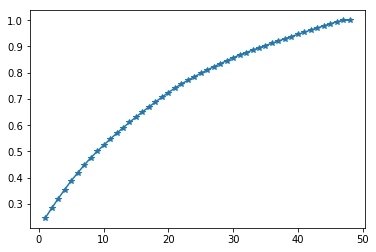

In [62]:
plt.plot(range(1,len(explained_variance_by_k)+1),explained_variance_by_k,marker='*')
plt.show()

first 48 PC explain 100.0% variances
*********** Label [0] ***********
	<1> sandwich bags
	<2> aluminum foil
	<3> paper towels
	<4> toilet paper
*********** Label [1] ***********
	<1> sugar
	<2> lettuce
	<3> pet items
	<4> carrots
	<5> cucumbers
	<6> broccoli
	<7> cauliflower
*********** Label [2] ***********
	<1> bagels
	<2> tortillas
	<3> dinner rolls
	<4> sandwich loaves
*********** Label [3] ***********
	<1> shaving cream
*********** Label [4] ***********
	<1> soda
	<2> tea
	<3> juice
	<4> coffee
*********** Label [5] ***********
	<1> spaghetti sauce
	<2> canned vegetables
	<3> ketchup
*********** Label [6] ***********
	<1> butter
	<2> eggs
	<3> milk
	<4> cheeses
	<5> yogurt
*********** Label [7] ***********
	<1> poultry
	<2> beef
	<3> pork
*********** Label [8] ***********
	<1> waffles
	<2> flour
	<3> pasta
*********** Label [9] ***********
	<1> laundry detergent
	<2> dishwashing 
*********** Label [10] ***********
	<1> frozen vegetables
	<2> ice cream
*********** Label [11] *****

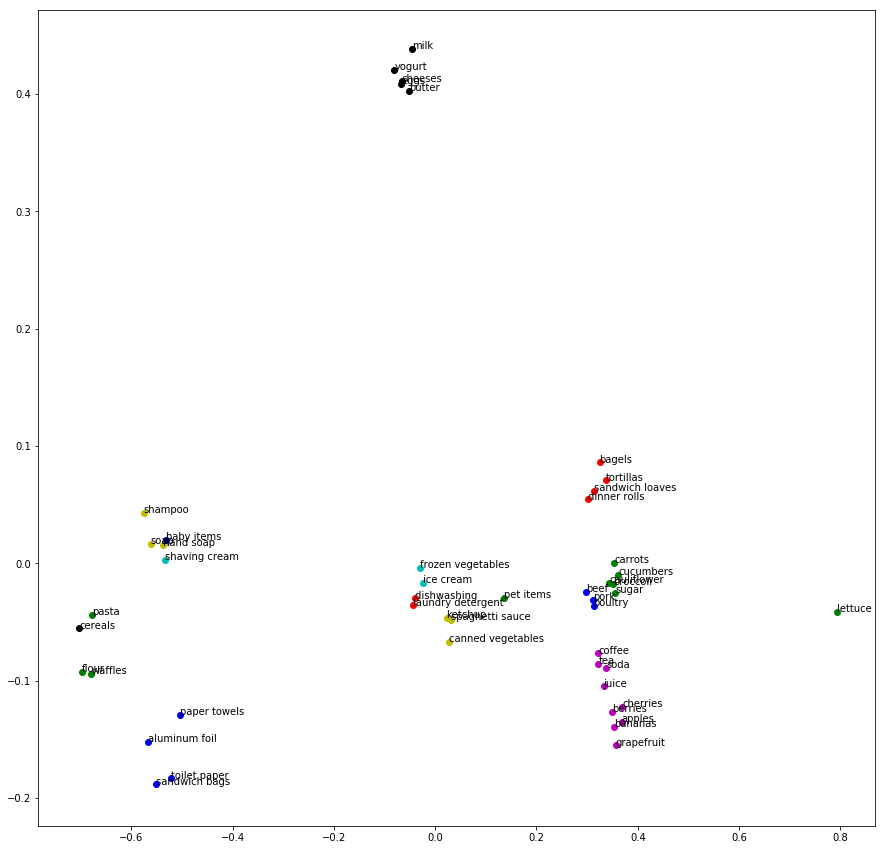

In [76]:

def show_clusters(items_rotated,labels):
    """
    plot and print clustering result
    """
    fig = plt.figure(figsize=(15, 15))
    colors =  itertools.cycle (["b","g","r","c","m","y","k"])

    grps = item_rotated.groupby(labels)
    for label,grp in grps:
        plt.scatter(grp.pc1,grp.pc2,c=next(colors),label = label)

        print ("*********** Label [{}] ***********".format(label))
        names = items.loc[ grp.index,"Item_name"]
        for index, name in enumerate(names):
            print ("\t<{}> {}".format(index+1,name))

    # annotate
    for itemid in item_rotated.index:
        x = item_rotated.loc[itemid,"pc1"]
        y = item_rotated.loc[itemid,"pc2"]
        name = items.loc[itemid,"Item_name"]
        name = re.sub('\W', ' ', name)
        plt.text(x,y,name)
    plt.show()

    # plt.legend(loc="best")
def cluster(n_clusters,n_components=48):
    """
    n_components=K, means use first K principle components in the clustering
    n_clusters: the number of clusters we want to cluster
    """
    print ("first {} PC explain {:.1f}% variances".format(n_components,
                                                         100 * sum(pca.explained_variance_ratio_[:n_components])))

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(item_rotated.values[:, :n_components])

    # display results
    show_clusters(item_rotated, kmeans.labels_)
    
cluster(15,n_components=48)
